In [160]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [161]:
def loss_function(x):
    return 0 if x > 0 else 1

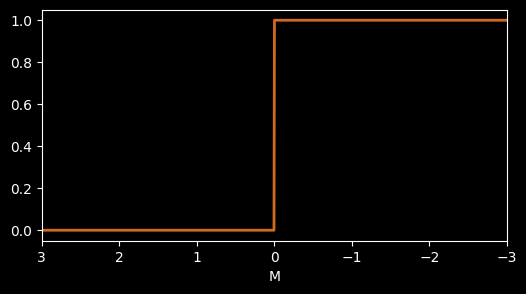

In [162]:
# Loss function (step function)

dots = np.linspace(-3, 3, 1000)
q_zero_one_loss = [loss_function(x) for x in dots]


plt.figure(figsize=(6, 3))
plt.plot(dots.reshape(-1, 1), q_zero_one_loss, c='chocolate', linewidth=2)
plt.xlabel('M')
plt.xlim(3, -3)
plt.show()

In [163]:
def exp_loss(x):
    return np.exp(-x)

#### Log loss
$\frac{\log_3 5}{\log_3 2}={\log_2 5}$

In [164]:
def logistic_loss(x):
    return np.log2(1 + np.exp(-x))

# logistic_loss == logistic_loss2
def logistic_loss2(x):
    return 1/np.log(2)*np.log(1 + np.exp(-x))

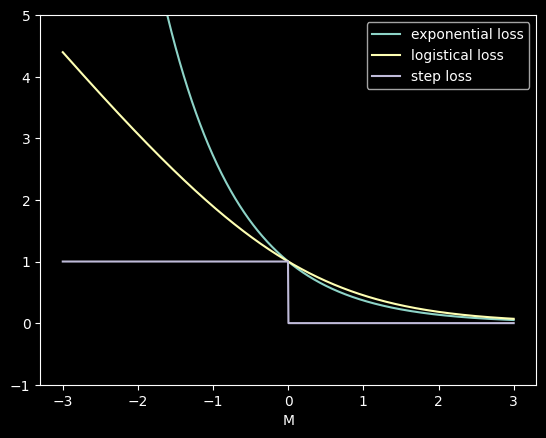

In [165]:
q_exp_loss = [exp_loss(x) for x in dots]
q_log_loss = [logistic_loss(x) for x in dots]


plt.figure()
plt.xlabel('M')
plt.plot(dots, q_exp_loss, label='exponential loss')
plt.plot(dots, q_log_loss, label='logistical loss')
plt.plot(dots, q_zero_one_loss, label='step loss')
plt.legend()
plt.ylim(-1, 5)
plt.show()

In [166]:
# Convert y => <w,X> to range [0;1]
# Sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

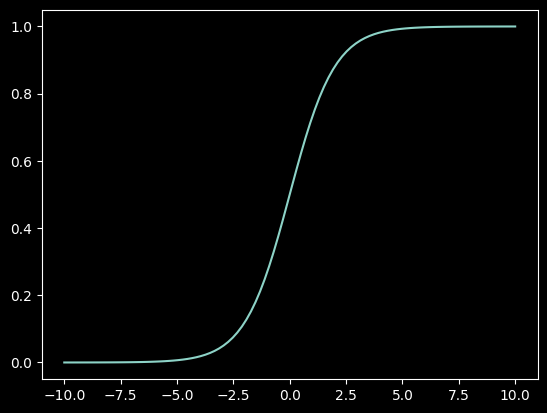

In [167]:
# the more <w,x> the more P
dots = np.linspace(-10, 10, 100)  # <w, X>
targets = list(map(sigmoid, dots))

plt.plot(dots, targets)
plt.show()

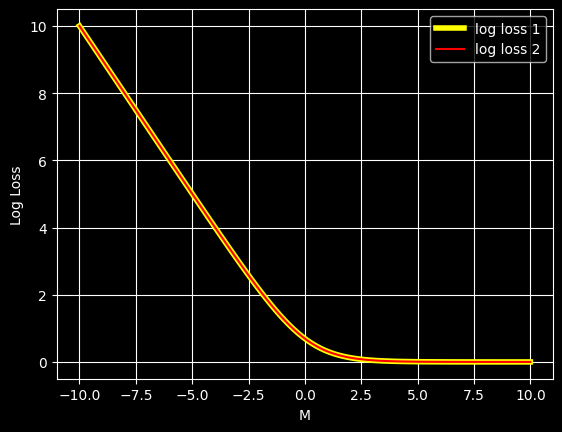

In [195]:
dots = np.linspace(-10, 10, 100)
log_loss_value1 = list(map(lambda x: -np.log(1 / (1+np.exp(-x))), dots))
log_loss_value2 = list(map(lambda x: np.log(1 + np.exp(-x)), dots))

plt.xlabel('M')
plt.ylabel('Log Loss')
plt.grid()
plt.plot(dots, log_loss_value1, c='yellow', label='log loss 1', linewidth=4)
plt.plot(dots, log_loss_value2, c='red', label='log loss 2')
plt.legend()
plt.show()

In [169]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

display(X, y)

array([[ 1.30022717, -0.7856539 ],
       [ 1.44184425, -0.56008554],
       [-0.84792445, -1.36621324],
       [-0.72215015, -1.41129414],
       [-1.27221465,  0.25945106],
       [ 0.78694271,  0.94294879],
       [ 0.81695766, -1.12478707],
       [ 1.6822707 , -0.67596877],
       [-1.07223343, -0.7701513 ],
       [-0.06539297,  1.11257376],
       [-1.33232952,  0.60245671],
       [-0.6963714 ,  0.96382716],
       [ 0.82340614,  0.7561926 ],
       [-1.5155534 , -0.15804853],
       [-0.78971776,  1.70347973],
       [ 0.85887841,  1.04457966],
       [-0.45001335,  0.27345841],
       [ 0.7099324 ,  0.69020919],
       [-0.79095935,  1.60495551],
       [-1.08077536, -1.15530746],
       [-1.5691733 , -0.54054806],
       [-0.52568843,  1.52568161],
       [-1.27406042, -0.1434304 ],
       [ 0.89621114, -1.11509679],
       [-0.85259895, -1.42554982],
       [-0.63262806,  1.2217558 ],
       [-0.86447712, -1.40921978],
       [-0.47819102,  3.17462483],
       [-1.25230004,

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

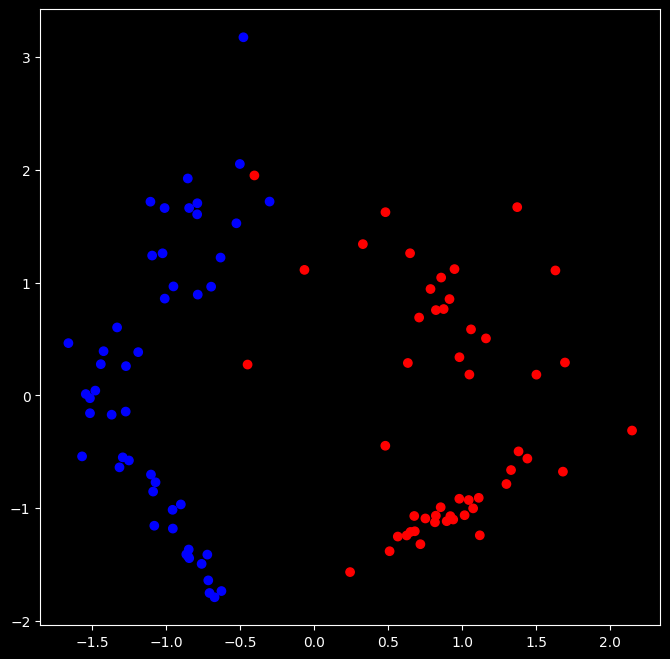

In [170]:
colors = ListedColormap(['blue', 'red'])

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)
plt.show()

In [171]:
# mix dataset
shuffle_index = np.random.permutation(X.shape[0]) # shuffle indexes
display(shuffle_index)
X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

# train test
train_proportion = 0.7

train_test_cut = int(len(X) * train_proportion)

X_train = X_shuffled[0: train_test_cut]
X_test = X_shuffled[train_test_cut:]
y_train = y_shuffled[0: train_test_cut]
y_test = y_shuffled[train_test_cut:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

array([23, 48, 98, 83, 69, 67, 64,  2, 35, 45, 90, 13, 27, 99, 82, 30, 21,
       12, 77,  0, 96, 54, 28, 87, 53,  6,  9, 38, 20, 17, 19, 78, 44, 88,
       49, 52, 66, 91, 11, 24, 10, 79, 84, 74, 65, 68, 31, 63, 18, 92, 22,
       59, 85,  4, 46, 55, 15, 56, 62, 32, 26,  7, 50, 86, 40, 81, 71, 72,
       75, 70, 97,  3, 57,  8, 34, 58, 93, 89, 36, 43, 80,  5, 25, 95, 41,
       60, 29, 47, 73, 61, 51, 94, 39, 37, 33,  1, 16, 76, 42, 14])

(70, 2)
(30, 2)
(70,)
(30,)


In [172]:
# LogLoss with gradient
def log_loss(w, X, y):
    m = X.shape[0]
    A = sigmoid(np.dot(X, w))

    # labels 0, 1
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

    grad = 1.0 / m * X.T @ (A - y)

    return loss ,grad

In [173]:
# gradient descent
def optimize(w, X, y, n_iterations, eta):
    losses = []

    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)

    return w, losses

In [174]:
def predict(w, X):
    m = X.shape[0]

    y_predicted = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, w)))

    # P = 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5):
            y_predicted[i] = 1

        elif (A[i] <= 0.5):
            y_predicted[i] = 0

    return y_predicted

In [175]:
w0 = np.zeros(X_train.shape[1])

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

train_accuracy = np.mean(y_predicted_train == y_train) * 100.0
test_accuracy = np.mean(y_predicted_test == y_test) * 100.0

print(w)
print(f'{train_accuracy:.3f}')
print(f'{test_accuracy:.3f}')

[3.82923895 0.16405536]
97.143
96.667


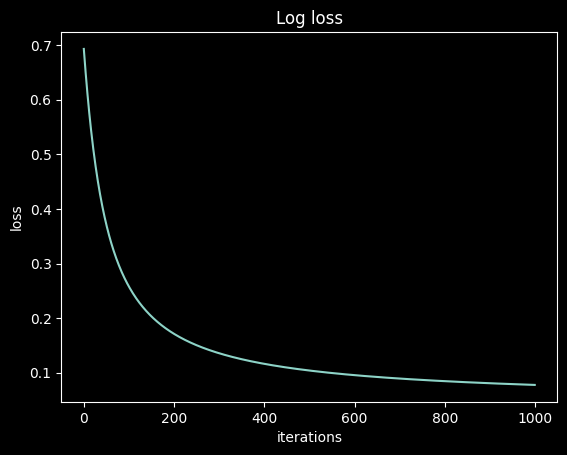

In [177]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)
plt.show()